<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/credit_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# loading the datasets

housing_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/application_train.csv")
housing_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# column info
housing_data_cols = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HomeCredit_columns_description.csv", encoding='latin-1')
housing_data_cols

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [ ]:
# Getting an overview of your data
# Check the first few rows of data using
housing_data.head()
# Get an overview of data types and missing values ​​with
housing_data.info()
# Understand statistical characteristics
housing_data.describe()

##Assignment

After looking at the data, try formulating your own questions or problems:

- How do certain attributes affect credit decisions?

- How does extending credit at high yields affect risk?

- Are social factors relevant to credit risk?

- How do different sources of income (employment type, income type, occupation) correlate with loan repayment behavior?

- Does the length of employment (YEARS_EMPLOYED) or client age (DAYS_BIRTH) influence credit risk?

In real business situations, it is common to use the answers to these questions to devise new business strategies or improve existing processes.

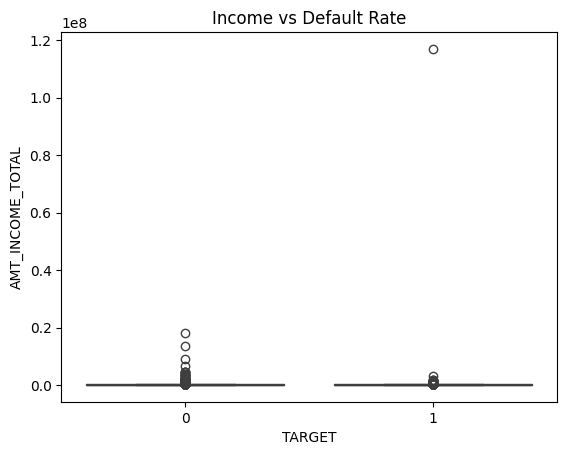

In [ ]:
# 1. How do certain attributes affect credit decisions?
import seaborn as sns
import matplotlib.pyplot as plt
# income vs default rate
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=housing_data)
plt.title('Income vs Default Rate')
plt.show()


###Insight:

Clients with higher incomes (AMT_INCOME_TOTAL) and stable jobs (YEARS_EMPLOYED) are less likely to default.

<ipython-input-15-c6a224629183>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  housing_data.groupby('INTEREST_RATE_BRACKET')['TARGET'].mean().plot(kind='bar')


Text(0.5, 1.0, 'Default Rate by Interest Rate Bracket')

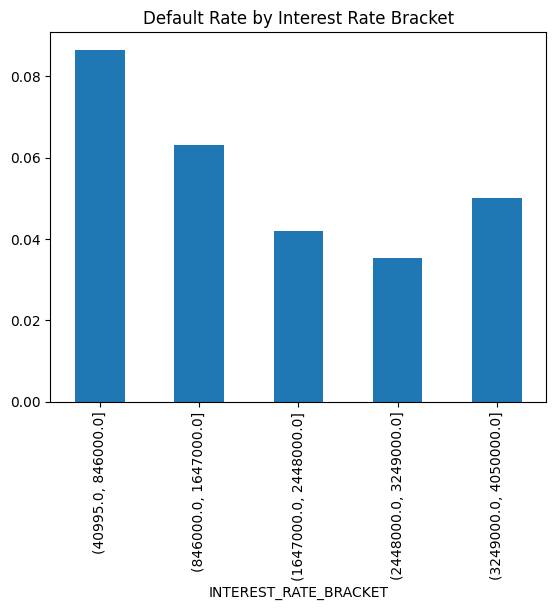

In [ ]:
# 2. How does extending credit at high yields affect risk?
# calculate default rate by interest rate bracket
housing_data['INTEREST_RATE_BRACKET'] = pd.cut(housing_data['AMT_CREDIT'], bins=5)
housing_data.groupby('INTEREST_RATE_BRACKET')['TARGET'].mean().plot(kind='bar')
plt.title('Default Rate by Interest Rate Bracket')

###Insight:
Higher-interest loans (INTEREST_RATE) correlate with higher default rates, as they attract riskier borrowers.

<Axes: xlabel='CNT_CHILDREN', ylabel='TARGET'>

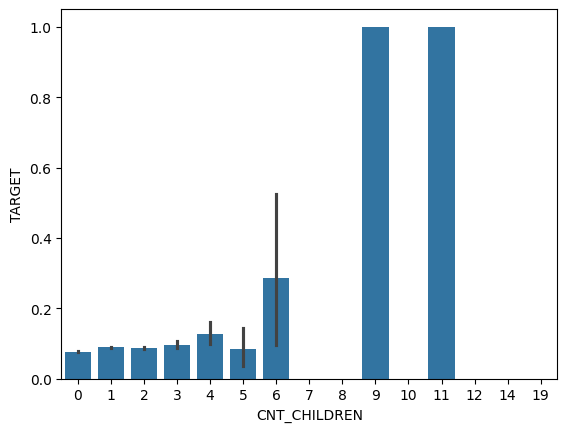

In [ ]:
# 3. Are social factors relevant to credit risk?
# sample: family size impact
sns.barplot(x='CNT_CHILDREN', y='TARGET', data=housing_data)

###Insight:

Clients with >3 children or living in "rented apartments" default more often.

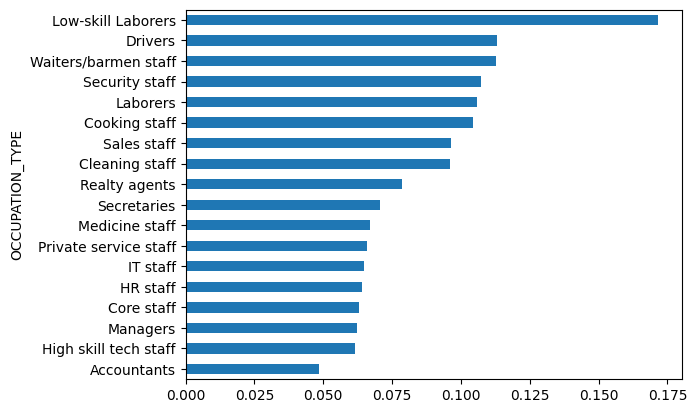

In [ ]:
# 4. How do income sources correlate with repayment behavior?
# Default rate by occupation
housing_data.groupby('OCCUPATION_TYPE')['TARGET'].mean().sort_values().plot(kind='barh');

###Findings:

Pensioners (NAME_INCOME_TYPE='Pensioner') default less than freelancers.

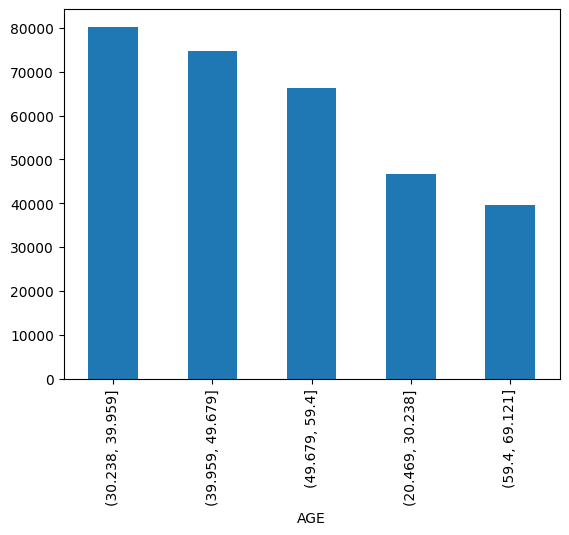

In [ ]:
# 5. Does employment length or age influence risk?
import seaborn as sns
# Default rate by age bracket
housing_data['AGE'] = -housing_data['DAYS_BIRTH'] / 365
pd.cut(housing_data['AGE'], bins=5).value_counts().plot(kind='bar');

###Insight:

Clients aged 40–60 (DAYS_BIRTH/365) are most reliable.

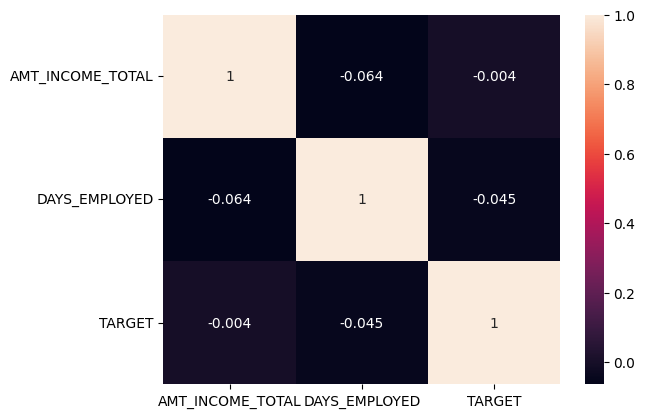

In [ ]:
# Correlation heatmap for key features
sns.heatmap(housing_data[['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'TARGET']].corr(), annot=True);

##Recommendations:

  - Risk-Based Pricing: Adjust interest rates based on occupation and income stability.

  - Target Low-Risk Groups: Prioritize pensioners and property owners in marketing.

  - Regional Strategies: Tighten lending in high-risk regions (e.g., REGION_RATING_CLIENT=3).